TODO:
- [ ] de-rate Enrique's sensitivity data by 10%
    - His tables are in terms of $E_{shower}$
    - $E_{shower} = E_{CR,primary} \cdot 10^{-0.1}$
        - i.e. a 10^18 eV primary cosmic ray produces a 10^17 eV shower, corresponding to trigger efficiency 0.1671
- [ ] stop using the GUNS -> find an equivalent spectrum for cosmic ray flux

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# dir = 'Sensitivity'
# # read the data from each csv file into a combined array
# data = []
# files = ['10e15-10e18 Black1.csv', '10e15-10e18 Black2.csv', '10e15-10e18 Blue.csv', '10e15-10e18 Orange.csv']
#
# for file in files:
#     file_path = f'{dir}/{file}'
#     file_data = np.loadtxt(file_path, delimiter=',', skiprows=1)
#     data.append(file_data)
# data = np.vstack(data)  # combine all data into a single array
# # sort the data by the first column (energy)
# data = data[np.argsort(data[:, 0])]
# # divide the x and y data by 10 because the scale was off in the point getting site
# data[:, 0] /= 10
# data[:, 1] /= 10

In [3]:
dir = 'Sensitivity'
# read the data from each csv file into a combined array
data = []
# files = ['10e15-10e18 Black1 upper.csv', '10e15-10e18 Black2 upper.csv', '10e15-10e18 Blue upper.csv', '10e15-10e18 Orange upper.csv']
# files = ['10e15-10e18 Black1 upper.csv', '10e15-10e18 Black2 upper - cut.csv', '10e15-10e18 Blue upper.csv', '10e15-10e18 orange upper - cut.csv']
files = ['10e15-10e18 Black1 upper.csv', '10e15-10e18 Black2 upper - cut.csv', '10e15-10e18 Blue upper.csv', '10e15-10e18 orange upper - cut.csv', 'projection.csv']
for file in files:
    file_path = f'{dir}/{file}'
    file_data = np.loadtxt(file_path, delimiter=',', skiprows=1)
    data.append(file_data)

In [4]:
# add the file 'projection.csv' to data2 and interpolate it to have more dense points

In [5]:
data = np.vstack(data)  # combine all data into a single array
# sort the data by the first column (energy)
data = data[np.argsort(data[:, 0])]
# divide the x and y data by 10 because the scale was off in the point getting site
data[:, 0] /= 10
data[:, 1] /= 10

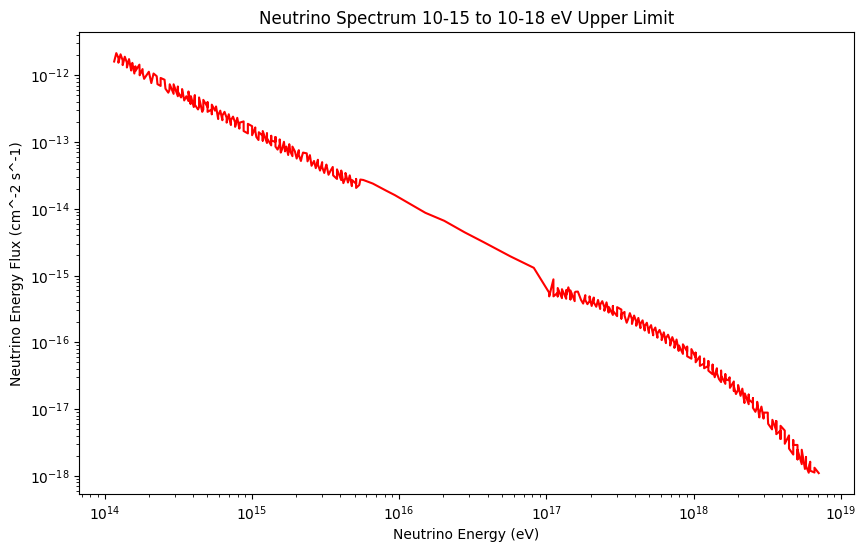

In [6]:
# plot the data
plt.figure(figsize=(10, 6))
plt.plot(data[:, 0], data[:, 1], label='Sensitivity Upper', color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Neutrino Energy (eV)')
plt.ylabel('Neutrino Energy Flux (cm^-2 s^-1)')
plt.title('Neutrino Spectrum 10-15 to 10-18 eV Upper Limit')
# plt.grid(True, which='both', ls='--', lw=0.5)
plt.savefig(f'{dir}/Cropped Spectrum.png', dpi=300)

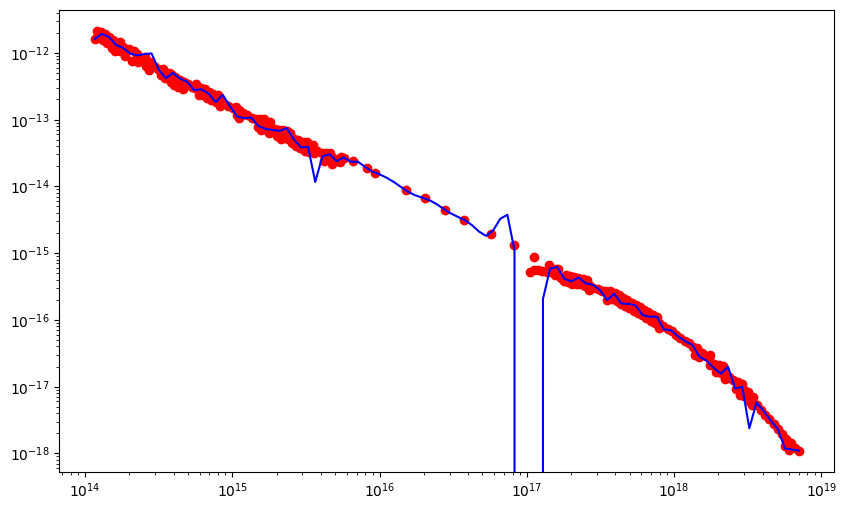

In [7]:
# TODO: fit a nice curve or normalize the data
# for any duplicate x values, average the y values
unique_x = np.unique(data[:, 0])
averaged_data = []
for x in unique_x:
    y_values = data[data[:, 0] == x, 1]
    averaged_y = np.mean(y_values)
    averaged_data.append([x, averaged_y])
data = np.array(averaged_data)
# interpolate the data to get a smooth curve
from scipy.interpolate import interp1d
interp_func = interp1d(data[:, 0], data[:, 1], kind='cubic', fill_value="extrapolate")
x_new = np.logspace(np.log10(min(data[:, 0])), np.log10(max(data[:, 0])), 100)
y_new = interp_func(x_new)
# plot the interpolated data
plt.figure(figsize=(10, 6))
plt.plot(data[:, 0], data[:, 1], 'o', label='Original Data', color='red')
plt.plot(x_new, y_new, label='Interpolated Data', color='blue')
plt.xscale('log')
plt.yscale('log')

In [8]:
# discrete_sensitivity in form log10(E), efficiency
# 16.0 0.0204
# 16.5, 0.1082
# 17.0, 0.1671
# 17.5, 0.2144
# 18.0, 0.2460
# 18.5, 0.2849
# 19.0, 0.2938

discrete_sensitivity = np.array([
    [16.0, 0.0204],
    [16.5, 0.1082],
    [17.0, 0.1671],
    [17.5, 0.2144],
    [18.0, 0.2460],
    [18.5, 0.2849],
    [19.0, 0.2938]
])
# interpolate the discrete sensitivity to get a smooth curve
from scipy.interpolate import interp1d
interp_func = interp1d(discrete_sensitivity[:, 0], discrete_sensitivity[:, 1], kind='cubic', fill_value="extrapolate")
x_new = np.linspace(16, 19, 100)
y_new = interp_func(x_new)

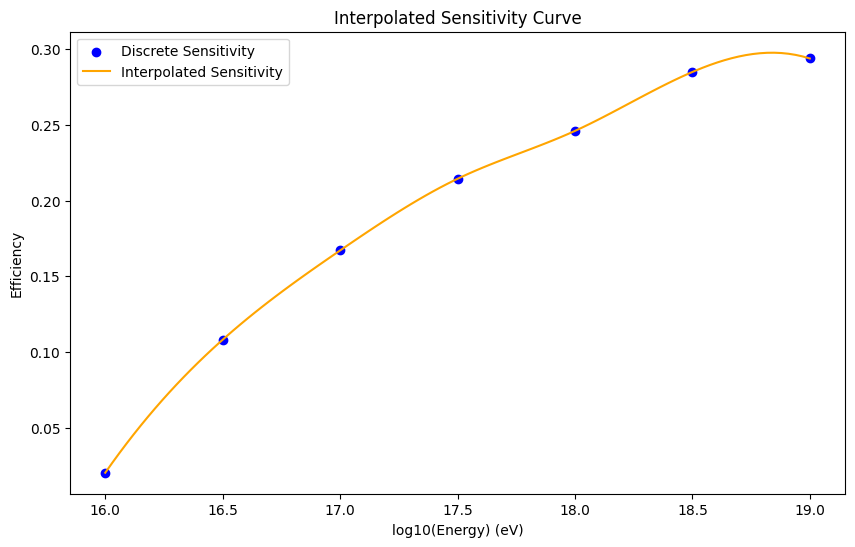

In [9]:
# as a dummy test, plot the interpolated sensitivity curve over a scatter plot of the discrete points
plt.figure(figsize=(10, 6))
plt.scatter(discrete_sensitivity[:, 0], discrete_sensitivity[:, 1], label='Discrete Sensitivity', color='blue')
plt.plot(x_new, y_new, label='Interpolated Sensitivity', color='orange')
plt.xlabel('log10(Energy) (eV)')
plt.ylabel('Efficiency')
plt.title('Interpolated Sensitivity Curve')
plt.legend()
# plt.grid(True)
plt.savefig(f'{dir}/Interpolated RNO-G Sensitivity.png', dpi=300)

In [10]:
# find the estimated number of events at each energy in data by multiplying the sensitivity by the flux
# do not interpolate the data, just use the data points as they are
estimated_events = []
for energy, flux in zip(data[:, 0], data[:, 1]):
    log_energy = np.log10(energy)
    efficiency = interp_func(log_energy)
    estimated_event = flux * efficiency
    estimated_events.append(estimated_event)
estimated_events = np.array(estimated_events)


(1e+16, 1e+19)

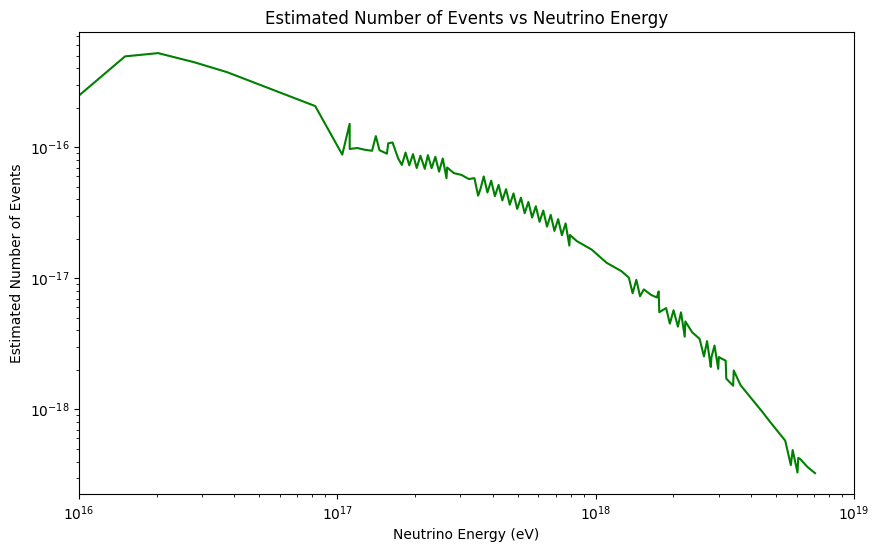

In [11]:
# plot the estimated number of events vs energy
plt.figure(figsize=(10, 6))
plt.plot(data[:, 0], estimated_events, label='Estimated Events', color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Neutrino Energy (eV)')
plt.ylabel('Estimated Number of Events')
plt.title('Estimated Number of Events vs Neutrino Energy')
plt.xlim(1e16, 1e19)

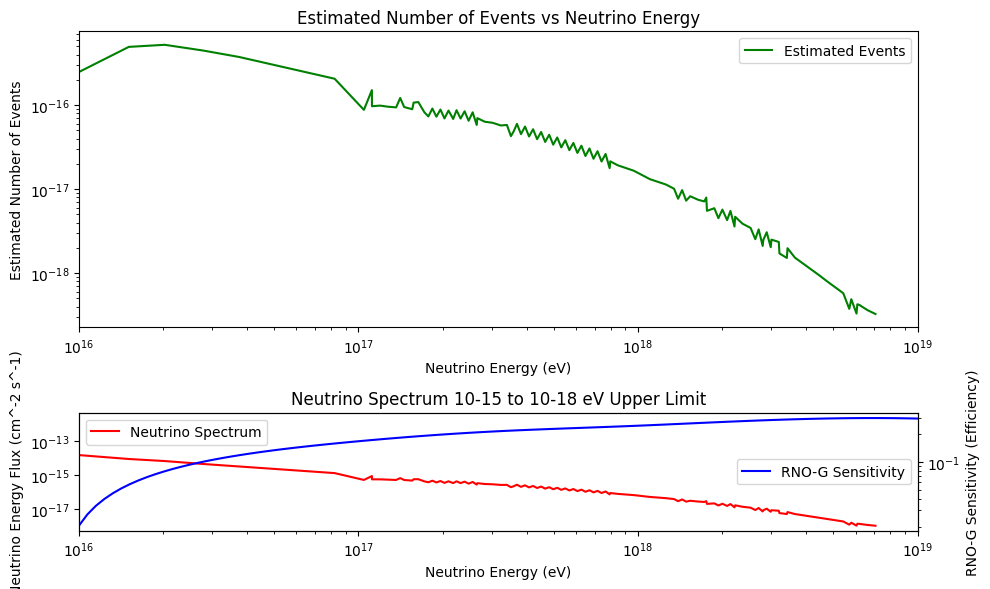

In [27]:
# plot the estimated number of events vs energy with the sensitivity curve and neutrino spectrum in a plot below
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [2.5, 1]})
# plot estimated events
ax1.plot(data[:, 0], estimated_events, label='Estimated Events', color='green')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Neutrino Energy (eV)')
ax1.set_ylabel('Estimated Number of Events')
ax1.set_title('Estimated Number of Events vs Neutrino Energy')
ax1.set_xlim(1e16, 1e19)
# ax1.grid(True, which='both', ls='--', lw=0.5)
# plot sensitivity and neutrino spectrum
ax2.plot(data[:, 0], data[:, 1], label='Neutrino Spectrum', color='red')
ax2.set_xlim(1e16, 1e19)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('Neutrino Energy (eV)')
ax2.set_ylabel('Neutrino Energy Flux (cm^-2 s^-1)')
ax2.set_title('Neutrino Spectrum 10-15 to 10-18 eV Upper Limit')
# ax2.grid(True, which='both', ls='--', lw=0.5)
# twin axis for sensitivity
ax3 = ax2.twinx()
ax3.plot(10**x_new, y_new, label='RNO-G Sensitivity', color='blue')
ax3.set_yscale('log')
ax3.set_ylabel('RNO-G Sensitivity (Efficiency)')
# add legends
ax1.legend()
ax2.legend(loc='upper left')
ax3.legend(loc='right')
# ax2.legend()
# ax3.legend()
plt.tight_layout()

plt.savefig(f'{dir}/Estimated Events and Sensitivity.png', dpi=300)